<a href="https://colab.research.google.com/github/MilanSinghBisht/collab-works/blob/main/2D_CNN_in_TensorFlow_2_for_cifar10_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##this work is only to understand how CNN works not focusing on result ,accuracy

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense , Dropout , Conv2D, MaxPool2D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
classes_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
X_train.max()

255

In [9]:
X_train = X_train /255
X_test = X_test / 255

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.shape

(10000, 32, 32, 3)

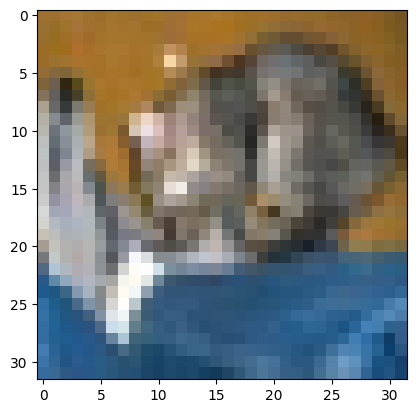

In [17]:

plt.imshow(X_test[0])

In [19]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

##Building CNN model

In [21]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu',input_shape= [32,32,3]))
model.add(Conv2D(filters = 32,kernel_size=(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 10,activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ["sparse_categorical_accuracy"])

In [26]:
histort = model.fit(X_train,y_train,batch_size = 10,epochs = 10 , verbose = 1,validation_data = (X_test,y_test))

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 204s 40ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.5156 - val_sparse_categorical_accuracy: 0.1021
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 200s 40ms/step - loss: 2.3030 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.5150 - val_sparse_categorical_accuracy: 0.1011
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 210s 42ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.0998 - val_loss: 2.5200 - val_sparse_categorical_accuracy: 0.1021
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 271s 43ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.5211 - val_sparse_categorical_accuracy: 0.1014
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 251s 41ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0993 - val_loss: 2.5145 - val_sparse_categorical_accuracy: 0.1009
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 251s 39ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1013 - val_loss: 2.5134 - val_sparse_cat

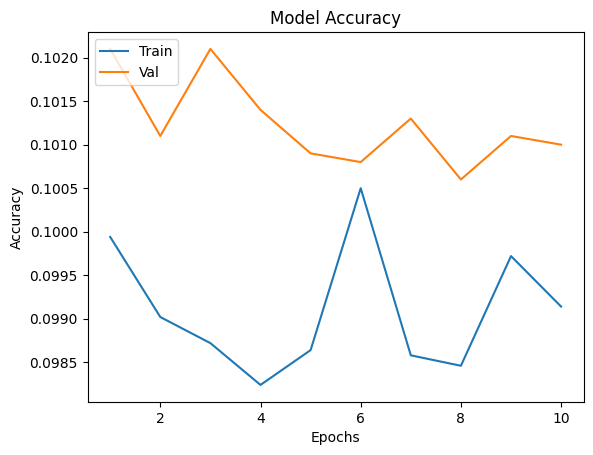

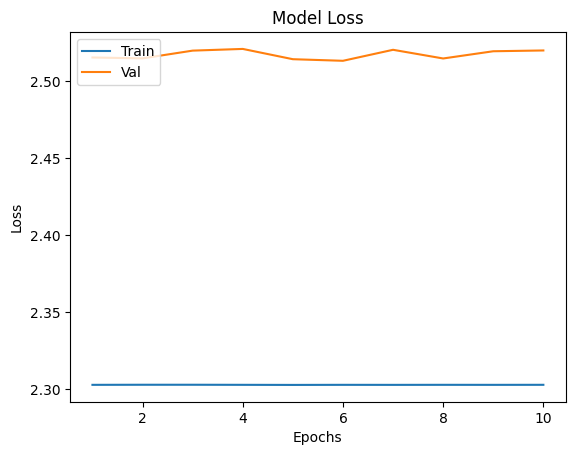

In [32]:
#plotting the trainig and validtion_accuracy values
epoch_range = range(1,11)
plt.plot(epoch_range,histort.history['sparse_categorical_accuracy']) # Changed history to histor
plt.plot(epoch_range,histort.history['val_sparse_categorical_accuracy']) # Changed history to histor
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Val"],loc= 'upper left') # Changed 'upper_left' to 'upper left'
plt.show()

#plottting the training and validation_loss values
plt.plot(epoch_range,histort.history['loss']) # Changed history to histor, and removed the extra history argument.
plt.plot(epoch_range,histort.history['val_loss']) # Changed history to histor
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train',"Val"],loc = 'upper left') # Changed 'upper_left' to 'upper left'
plt.show()

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [34]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [35]:
y_pred

array([[0.09667608, 0.18840264, 0.08935965, ..., 0.04351155, 0.06336171,
        0.19568186],
       [0.08788713, 0.20953153, 0.07082897, ..., 0.02709544, 0.0493093 ,
        0.25675994],
       [0.09180855, 0.19411433, 0.07850061, ..., 0.03634487, 0.0608725 ,
        0.23159786],
       ...,
       [0.10024554, 0.14574023, 0.10270284, ..., 0.06805866, 0.07784341,
        0.14332272],
       [0.09482544, 0.17646483, 0.09015794, ..., 0.04563341, 0.06444074,
        0.19324613],
       [0.10051456, 0.17489606, 0.08649761, ..., 0.04521862, 0.06522251,
        0.19263951]], dtype=float32)

In [36]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

#  y_pred_classes in confusion_matrix
mat = confusion_matrix(y_test, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

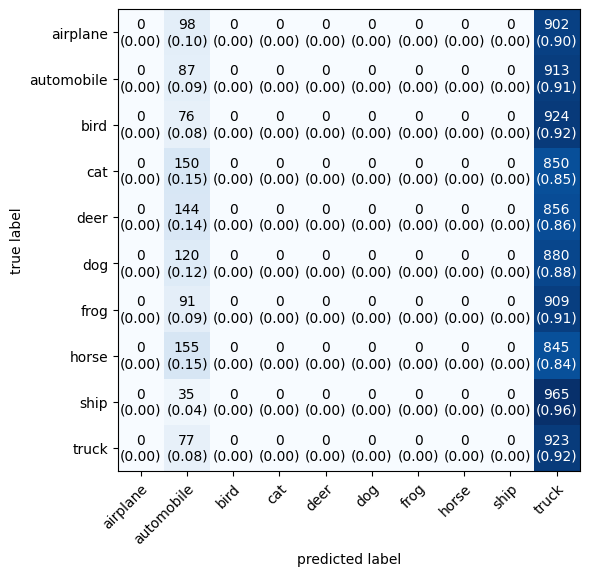

In [41]:
plot_confusion_matrix(mat,figsize=(6,6),class_names= classes_name,show_normed = True)